In [1]:
# パッケージのインポート
import pandas as pd
import pandas_profiling as pdp
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# pandasの設定
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:.2f}'.format

In [145]:
# dataの読み込み
df_train = pd.read_csv('../200_input/train.csv')
df_food = pd.read_csv('../200_input/food_uriage.csv')
df_uriage = pd.read_csv('../200_input/uriage.csv')
df_tenki = pd.read_csv('../200_input/tenki.csv')
df_kyaku = pd.read_csv('../200_input/kyaku.csv')
df_test = pd.read_csv('../200_input/test.csv')
df_tenki_k = pd.read_csv('../200_input/tenki_data_kanagawa.csv', header=3)

In [146]:
display(df_train.head(3))
display(df_uriage.head(3))
display(df_food.head(3))
display(df_kyaku.head(3))
display(df_tenki.head(3))
display(df_test.head(3))
display(df_tenki_k.head(3))

,nichi,group_mise,group_item,target
0,20180301,X,A,183
1,20180301,X,B,22
2,20180301,X,C,8


,nichi,group_mise,uriage_param
0,20180301,X,0.59
1,20180301,Y,0.66
2,20180301,Z,0.44


,nichi,group_mise,food_uriage_wariai
0,20180301,X,0.89
1,20180301,Y,0.88
2,20180301,Z,0.92


,nichi,group_mise,kyaku_param
0,20180301,X,0.85
1,20180301,Y,0.71
2,20180301,Z,0.69


,nichi,kion_max,kion_min,kion_ave,kion_asa,kion_hiru,kion_yoru,kousuiryou,kousuiryou_asa,kousuiryou_hiru,kousuiryou_yoru,kousuiryou_jikan,kousuiryou_asa_jikan,kousuiryou_hiru_jikan,kousuiryou_yoru_jikan,tenki_id2,tenki_id2_asa,tenki_id2_hiru,tenki_id2_yoru
0,20180301,21,7,13,10,17,13,62,62,0,0,7,7,0,0,30,30,10,10
1,20180302,14,6,10,9,13,9,0,0,0,0,0,0,0,0,10,20,10,10
2,20180303,15,5,10,6,14,12,0,0,0,0,0,0,0,0,20,20,10,20


,nichi,group_mise,group_item,target
0,20200601,X,A,nan
1,20200601,X,B,nan
2,20200601,X,C,nan


,年月日,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),降水量の合計(mm).1,日照時間(時間),平均風速(m/s),平均蒸気圧(hPa),天気概況(昼：06時～18時)
0,2018/3/1,13.10,20.80,6.50,61.50,0,7.60,5.80,9.50,晴一時雨、雷を伴う
1,2018/3/2,10.20,14.10,6.30,0.00,1,10.70,3.00,4.60,晴
2,2018/3/3,10.00,15.30,4.70,0.00,1,8.90,2.40,6.30,薄曇時々晴


In [147]:
# 月と曜日の列を追加
df_train['nichi'] = pd.to_datetime(df_train['nichi'], format='%Y%m%d')
df_uriage['nichi'] = pd.to_datetime(df_train['nichi'], format='%Y%m%d')
df_food['nichi'] = pd.to_datetime(df_train['nichi'], format='%Y%m%d')
df_kyaku['nichi'] = pd.to_datetime(df_train['nichi'], format='%Y%m%d')
df_tenki['nichi'] = pd.to_datetime(df_train['nichi'], format='%Y%m%d')
df_test['nichi'] = pd.to_datetime(df_train['nichi'], format='%Y%m%d')
df_tenki_k['年月日'] = pd.to_datetime(df_tenki_k['年月日'], format='%Y/%m/%d')
df_train['year'] = df_train['nichi'].dt.strftime('%Y')
df_train['month'] = df_train['nichi'].dt.strftime('%m')
df_train['youbi'] = df_train['nichi'].dt.strftime('%a')

In [6]:
df_train.head(3)

,nichi,group_mise,group_item,target,year,month,youbi
0,2018-03-01,X,A,183,2018,03,Thu
1,2018-03-01,X,B,22,2018,03,Thu
2,2018-03-01,X,C,8,2018,03,Thu


### データビューイング

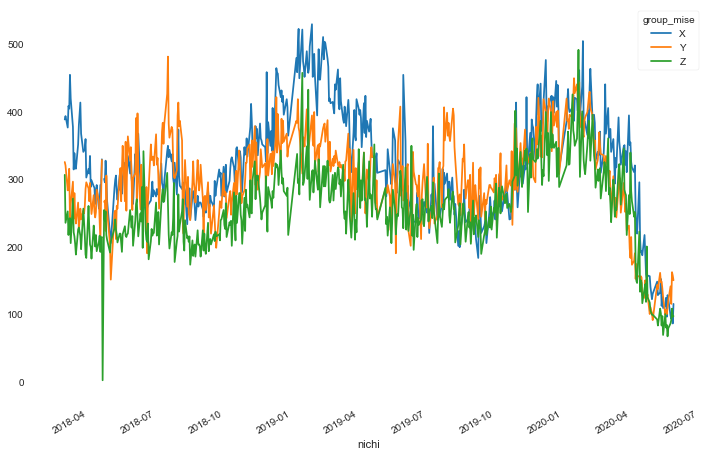

In [7]:
# 店舗ごとの全商品の販売数
df_pts = df_train.pivot_table('target', aggfunc='sum', index='nichi', columns='group_mise')
fig = plt.figure(figsize=(12,8))
df_pts.plot(ax=fig.add_subplot(1,1,1))

##### メモ

3月以降にコロナの影響を受けているのが見受けられる  
Zにある外れ値は除く必要あり  

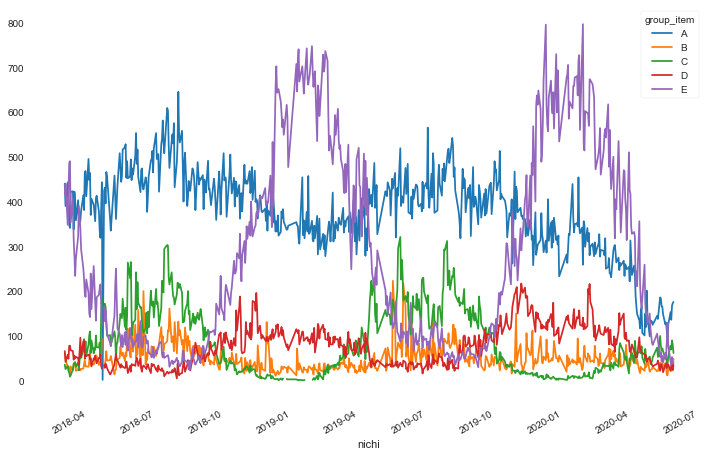

In [8]:
# 商品ごとの全店舗の販売数
df_pti = df_train.pivot_table('target', aggfunc='sum', index='nichi', columns='group_item')
fig = plt.figure(figsize=(12,8))
df_pti.plot(ax=fig.add_subplot(1,1,1))

##### メモ

商品ごとには分けるべき  
A以外は気候に左右されてる気がする  
コロナの影響があるのかは判断がつきづらい  
3月あたりだけで比較してみるべきかもしれない  
Bの外れ値の多い原因の解明が必要  

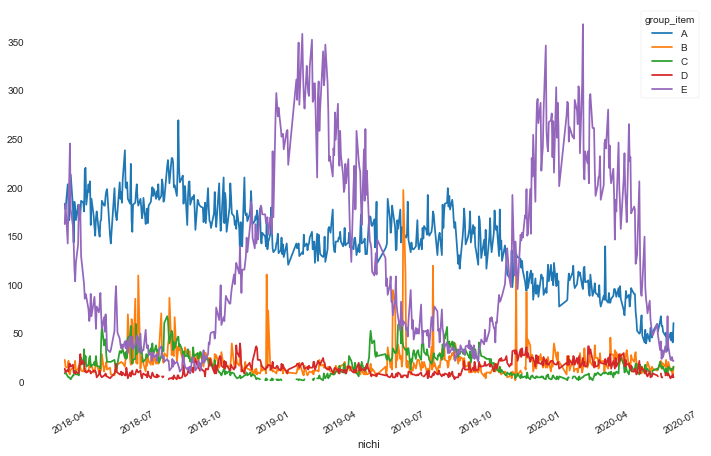

In [30]:
df_train_s = df_train[df_train['group_mise'] == 'X']
df_ptis = df_train_s.pivot_table('target', aggfunc='sum', index='nichi', columns='group_item')
fig = plt.figure(figsize=(12,8))
df_ptis.plot(ax=fig.add_subplot(1,1,1))

##### メモ

X店舗ではDの販売数が著しく低い。またCも他2店舗よりは低くなっている。   
Bの販売数は、多い順にZ→X→Y  

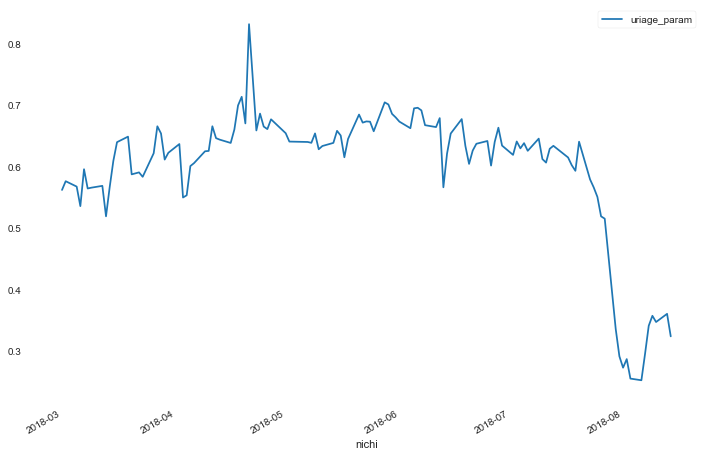

In [10]:
df_gb = pd.DataFrame(df_uriage.groupby('nichi')['uriage_param'].mean())
fig = plt.figure(figsize=(12,8))
df_gb.plot(ax=fig.add_subplot(1,1,1))

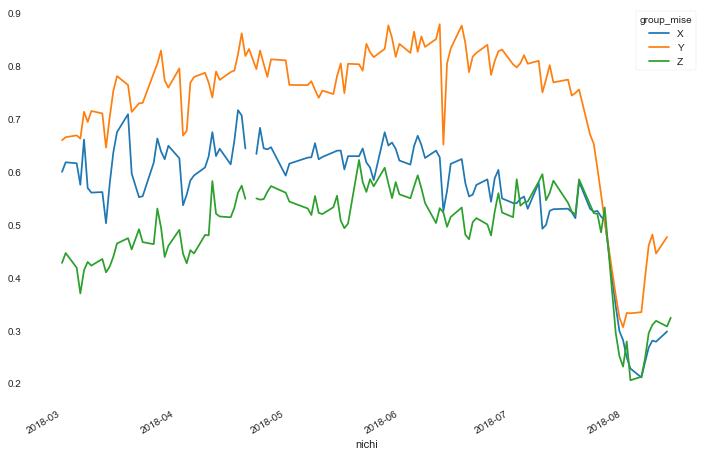

In [11]:
df_uriage_pt = df_uriage.pivot_table('uriage_param', index='nichi', columns='group_mise')
fig = plt.figure(figsize=(12,8))
df_uriage_pt.plot(ax=fig.add_subplot(1,1,1))

##### メモ

X,Zは2018年4月に店がしまっている時期がある。この事からX,Yは会社内にある店舗ではないかと推測する。  
したがって  
・Y = MMにある路面店  

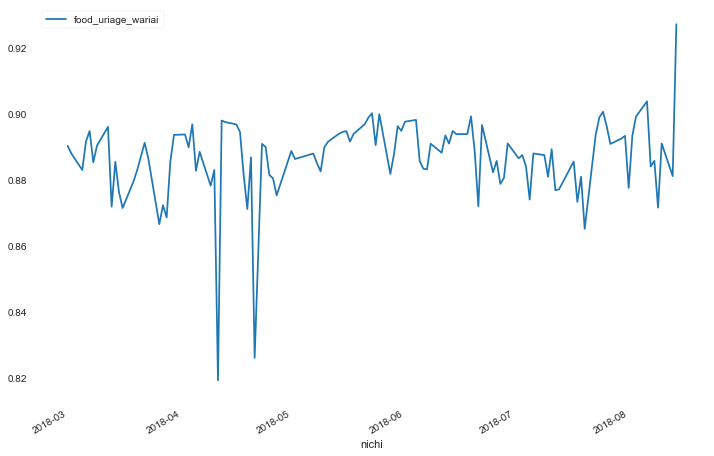

In [12]:
df_gb = pd.DataFrame(df_food.groupby('nichi')['food_uriage_wariai'].mean())
fig = plt.figure(figsize=(12,8))
df_gb.plot(ax=fig.add_subplot(1,1,1))

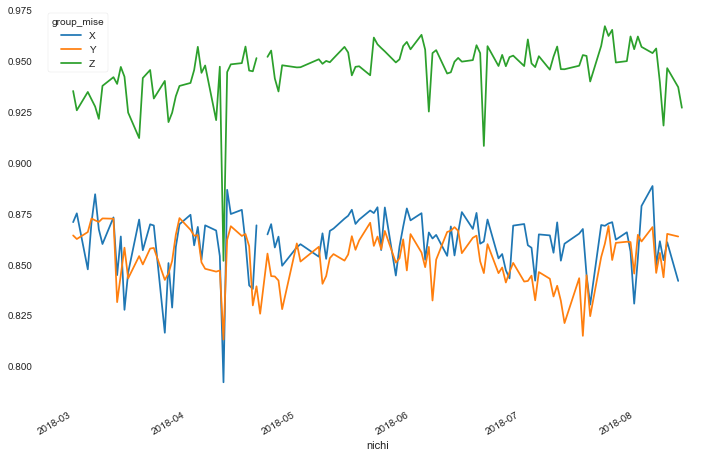

In [13]:
df_food_pt = df_food.pivot_table('food_uriage_wariai', index='nichi', columns='group_mise')
fig = plt.figure(figsize=(12,8))
df_food_pt.plot(ax=fig.add_subplot(1,1,1))

In [126]:
df_tenki.head(20)

,nichi,kion_max,kion_min,kion_ave,kion_asa,kion_hiru,kion_yoru,kousuiryou,kousuiryou_asa,kousuiryou_hiru,kousuiryou_yoru,kousuiryou_jikan,kousuiryou_asa_jikan,kousuiryou_hiru_jikan,kousuiryou_yoru_jikan,tenki_id2,tenki_id2_asa,tenki_id2_hiru,tenki_id2_yoru
0,2018-03-01,21,7,13,10,17,13,62,62,0,0,7,7,0,0,30,30,10,10
1,2018-03-01,14,6,10,9,13,9,0,0,0,0,0,0,0,0,10,20,10,10
2,2018-03-01,15,5,10,6,14,12,0,0,0,0,0,0,0,0,20,20,10,20
3,2018-03-01,20,8,15,11,19,16,0,0,0,0,0,0,0,0,10,20,10,10
4,2018-03-01,18,10,16,16,17,16,38,0,9,29,10,0,5,5,30,20,30,30
5,2018-03-01,11,6,9,8,10,8,1,1,0,0,1,1,0,0,30,30,10,10
6,2018-03-01,9,4,6,5,7,6,0,0,0,0,0,0,0,0,20,20,20,20
7,2018-03-01,14,4,6,4,6,9,31,1,8,22,14,2,4,8,30,30,30,30
8,2018-03-01,18,7,14,17,14,10,48,43,3,2,13,7,4,2,30,30,30,30
9,2018-03-01,11,5,8,6,10,8,2,2,0,0,3,3,0,0,30,30,10,10


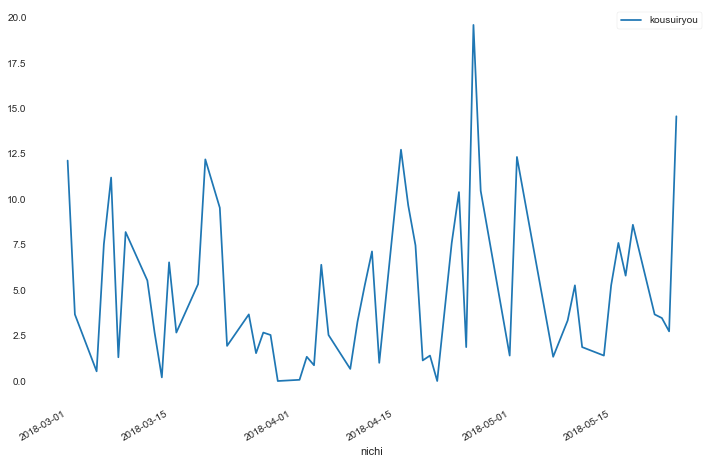

In [133]:
df_tenki_gb = pd.DataFrame(df_tenki.groupby(['nichi'])['kousuiryou'].mean())
fig = plt.figure(figsize=(12,8))
df_tenki_gb.plot(ax=fig.add_subplot(1,1,1))

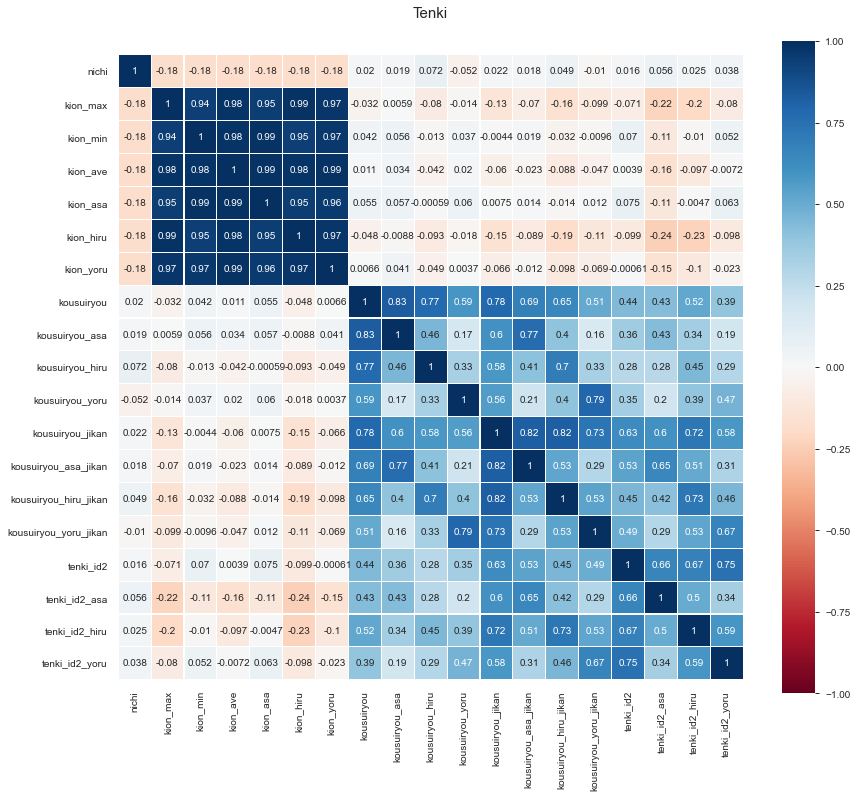

In [134]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Tenki', y=1.05, size=15)
sns.heatmap(df_tenki.select_dtypes(exclude='object').astype(int).corr(),linewidths=0.1,vmax=1.0, vmin=-1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

##### 方針

In [ ]:
店舗別、商品別

### 特徴量設計

In [14]:
# 特徴量の作成

In [186]:
df_train = pd.read_csv('../200_input/train.csv')
df_tenki_k = pd.read_csv('../200_input/tenki_data_kanagawa.csv', header=3)

df_train['nichi'] = pd.to_datetime(df_train['nichi'], format='%Y%m%d')
df_train['year'] = df_train['nichi'].dt.strftime('%Y')
df_train['month'] = df_train['nichi'].dt.strftime('%m')
df_train['youbi'] = df_train['nichi'].dt.strftime('%a')
df_train = df_train.drop(['nichi'], axis=1)
df_train = df_train.reindex(['year', 'month', 'youbi', 'group_mise', 'group_item', 'target'], axis=1)

df_tenki_k['年月日'] = pd.to_datetime(df_tenki_k['年月日'], format='%Y/%m/%d')
df_tenki_k['year'] = df_tenki_k['年月日'].dt.strftime('%Y')
df_tenki_k['month'] = df_tenki_k['年月日'].dt.strftime('%m')
df_tenki_k['youbi'] = df_tenki_k['年月日'].dt.strftime('%a')
df_tenki_k = pd.DataFrame(df_tenki_k[['year', 'month', 'youbi', '平均気温(℃)', '日照時間(時間)', '平均風速(m/s)', '平均蒸気圧(hPa)']])
df_tenki_k = pd.DataFrame(df_tenki_k[df_tenki_k['youbi'] != 'Sun'])

In [185]:
df_train_xa = df_train[(df_train['group_mise'] == 'X') & (df_train['group_item'] == 'A')]

In [189]:
df = pd.merge(df_train, df_tenki_k, how='left', on=['year', 'month', 'youbi'])

In [192]:
df.head(100)

,year,month,youbi,group_mise,group_item,target,平均気温(℃),日照時間(時間),平均風速(m/s),平均蒸気圧(hPa)
0,2018,03,Thu,X,A,183,13.10,7.60,5.80,9.50
1,2018,03,Thu,X,A,183,6.30,0.00,5.00,8.90
2,2018,03,Thu,X,A,183,16.00,7.90,5.30,11.40
3,2018,03,Thu,X,A,183,10.30,2.30,3.60,10.10
4,2018,03,Thu,X,A,183,18.20,10.80,3.00,11.70
5,2018,03,Thu,X,B,22,13.10,7.60,5.80,9.50
6,2018,03,Thu,X,B,22,6.30,0.00,5.00,8.90
7,2018,03,Thu,X,B,22,16.00,7.90,5.30,11.40
8,2018,03,Thu,X,B,22,10.30,2.30,3.60,10.10
9,2018,03,Thu,X,B,22,18.20,10.80,3.00,11.70


In [198]:
df_train.sort_values(['year', 'month', 'youbi', 'group_mise', 'group_item']).head(100)

,year,month,youbi,group_mise,group_item,target
15,2018,03,Fri,X,A,177
88,2018,03,Fri,X,A,213
163,2018,03,Fri,X,A,166
223,2018,03,Fri,X,A,186
298,2018,03,Fri,X,A,182
16,2018,03,Fri,X,B,15
89,2018,03,Fri,X,B,12
164,2018,03,Fri,X,B,10
224,2018,03,Fri,X,B,11
299,2018,03,Fri,X,B,9


In [187]:
df_tenki_k

,year,month,youbi,平均気温(℃),日照時間(時間),平均風速(m/s),平均蒸気圧(hPa)
0,2018,03,Thu,13.10,7.60,5.80,9.50
1,2018,03,Fri,10.20,10.70,3.00,4.60
2,2018,03,Sat,10.00,8.90,2.40,6.30
4,2018,03,Mon,16.10,0.10,6.60,16.40
5,2018,03,Tue,8.60,6.10,4.20,7.30
...,...,...,...,...,...,...,...
818,2020,05,Wed,22.40,8.20,2.50,20.20
819,2020,05,Thu,21.40,5.50,2.90,15.10
820,2020,05,Fri,21.10,12.20,3.00,16.00
821,2020,05,Sat,22.20,10.10,3.10,18.50


In [15]:
# 特徴量の標準化
# stsc = StandardScaler()
# X_stsc = pd.DataFrame(stsc.fit_transform(X), index=X.index, columns=X.columns)
# X_stsc.head()